<a href="https://colab.research.google.com/github/XinyaoTian/COMP5318_assignment2/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*


# 1. Data set up


In [0]:
# Environment setup
# Import assignment-wide packages
import sklearn
import numpy as np
import os
import pandas as pd
np.random.seed(42)

from random import uniform, randint
import math

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
# import hierarchical clustering packages
from sklearn.cluster import AgglomerativeClustering

# import DBSCAN packages
from sklearn.cluster import DBSCAN

# import evaluation packages
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [0]:
# visualisation packages
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Load Data

*Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.*



In [4]:
# Load TripAdviosr dataset from its original source
TA_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv", sep=',', encoding="utf-8")

# Have a brief view
TA_data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
# Statistical Description
TA_data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [6]:
# Load ICMLA papers dataset from its original source
ICMLA_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00434/ICMLA_2014.csv", sep=',', encoding="ISO-8859-1")

# Also have a brief look
ICMLA_data.head()

,paper_id,paper_title,author_keywords,abstract,session
0,1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods
1,2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete Fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods
2,3,Applying Swarm Ensemble Clustering Technique f...,"Software defect prediction, Particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods
3,4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods
4,5,Concept Drift Awareness in Twitter Streams,"Twitter, Adaptation models, Time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods


## 1.2 Data Preprocessing (optional)

***You are required to show your data preprocessing methods for the two datasets (if necessary)***

*You can apply different data preprocessing techniques in different data and clustering models if you need.*


### Travel Review Dataset

In [7]:
# Brief review the dataset
TA_data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [0]:
# It's obviously that 'User ID' is not meaningful when clustering
# So we delete that column
TA_data = TA_data.drop('User ID', 1)

In [0]:
TA_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [9]:
TA_data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
dtype: object

### ICMLA Datasets

In [37]:
# Brief View
ICMLA_data.head()

,paper_id,paper_title,author_keywords,abstract,session
0,1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods
1,2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete Fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods
2,3,Applying Swarm Ensemble Clustering Technique f...,"Software defect prediction, Particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods
3,4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods
4,5,Concept Drift Awareness in Twitter Streams,"Twitter, Adaptation models, Time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods


In [38]:
text_list = list()
# combine all text into one long string
for index, row in ICMLA_data.iterrows():
  text = str(row['paper_title']) + '/' + str(row['author_keywords']) + '/' + str(row['abstract'] + '/' + row['session'])
  text_list.append(text)

paper_data = pd.DataFrame({'paper_content': text_list})
paper_data.head()

,paper_content
0,Ensemble Statistical and Heuristic Models for ...
1,Improving Spectral Learning by Using Multiple ...
2,Applying Swarm Ensemble Clustering Technique f...
3,Reducing the Effects of Detrimental Instances/...
4,Concept Drift Awareness in Twitter Streams/Twi...


In [39]:
# Paper content data preprocessing
import nltk
from nltk.stem.snowball import SnowballStemmer
# regular expressions
import re 

stemmer = SnowballStemmer("english")
nltk.download('punkt')

# define text process function
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'tw

(105, 44)


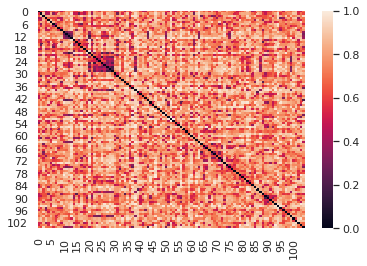

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns; 

### TfidfVectorizer will perform the vectorisation. Please explore the parameters at the user guide
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(paper_data['paper_content'])
dist = 1-cosine_similarity(tfidf_matrix)

sns.set()
ax = sns.heatmap(dist)

print(tfidf_matrix.shape)

In [41]:
# check the data type of tfidf_matrix
print(type(tfidf_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


In [0]:
# pre-clustering using hierarchical to have a brief view

# We'll use Scipy package for hierarchinal clustering
from scipy.cluster.hierarchy import complete, dendrogram

# use complete distance
linkage_matrix = complete(dist)

In [43]:
# get paper title as a np.array
paper_titles = ICMLA_data['paper_title'].to_numpy()
paper_titles[:5]

array(['Ensemble Statistical and Heuristic Models for Unsupervised Word Alignment',
       'Improving Spectral Learning by Using Multiple Representations',
       'Applying Swarm Ensemble Clustering Technique for Fault Prediction Using Software Metrics',
       'Reducing the Effects of Detrimental Instances',
       'Concept Drift Awareness in Twitter Streams'], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  app.launch_new_instance()


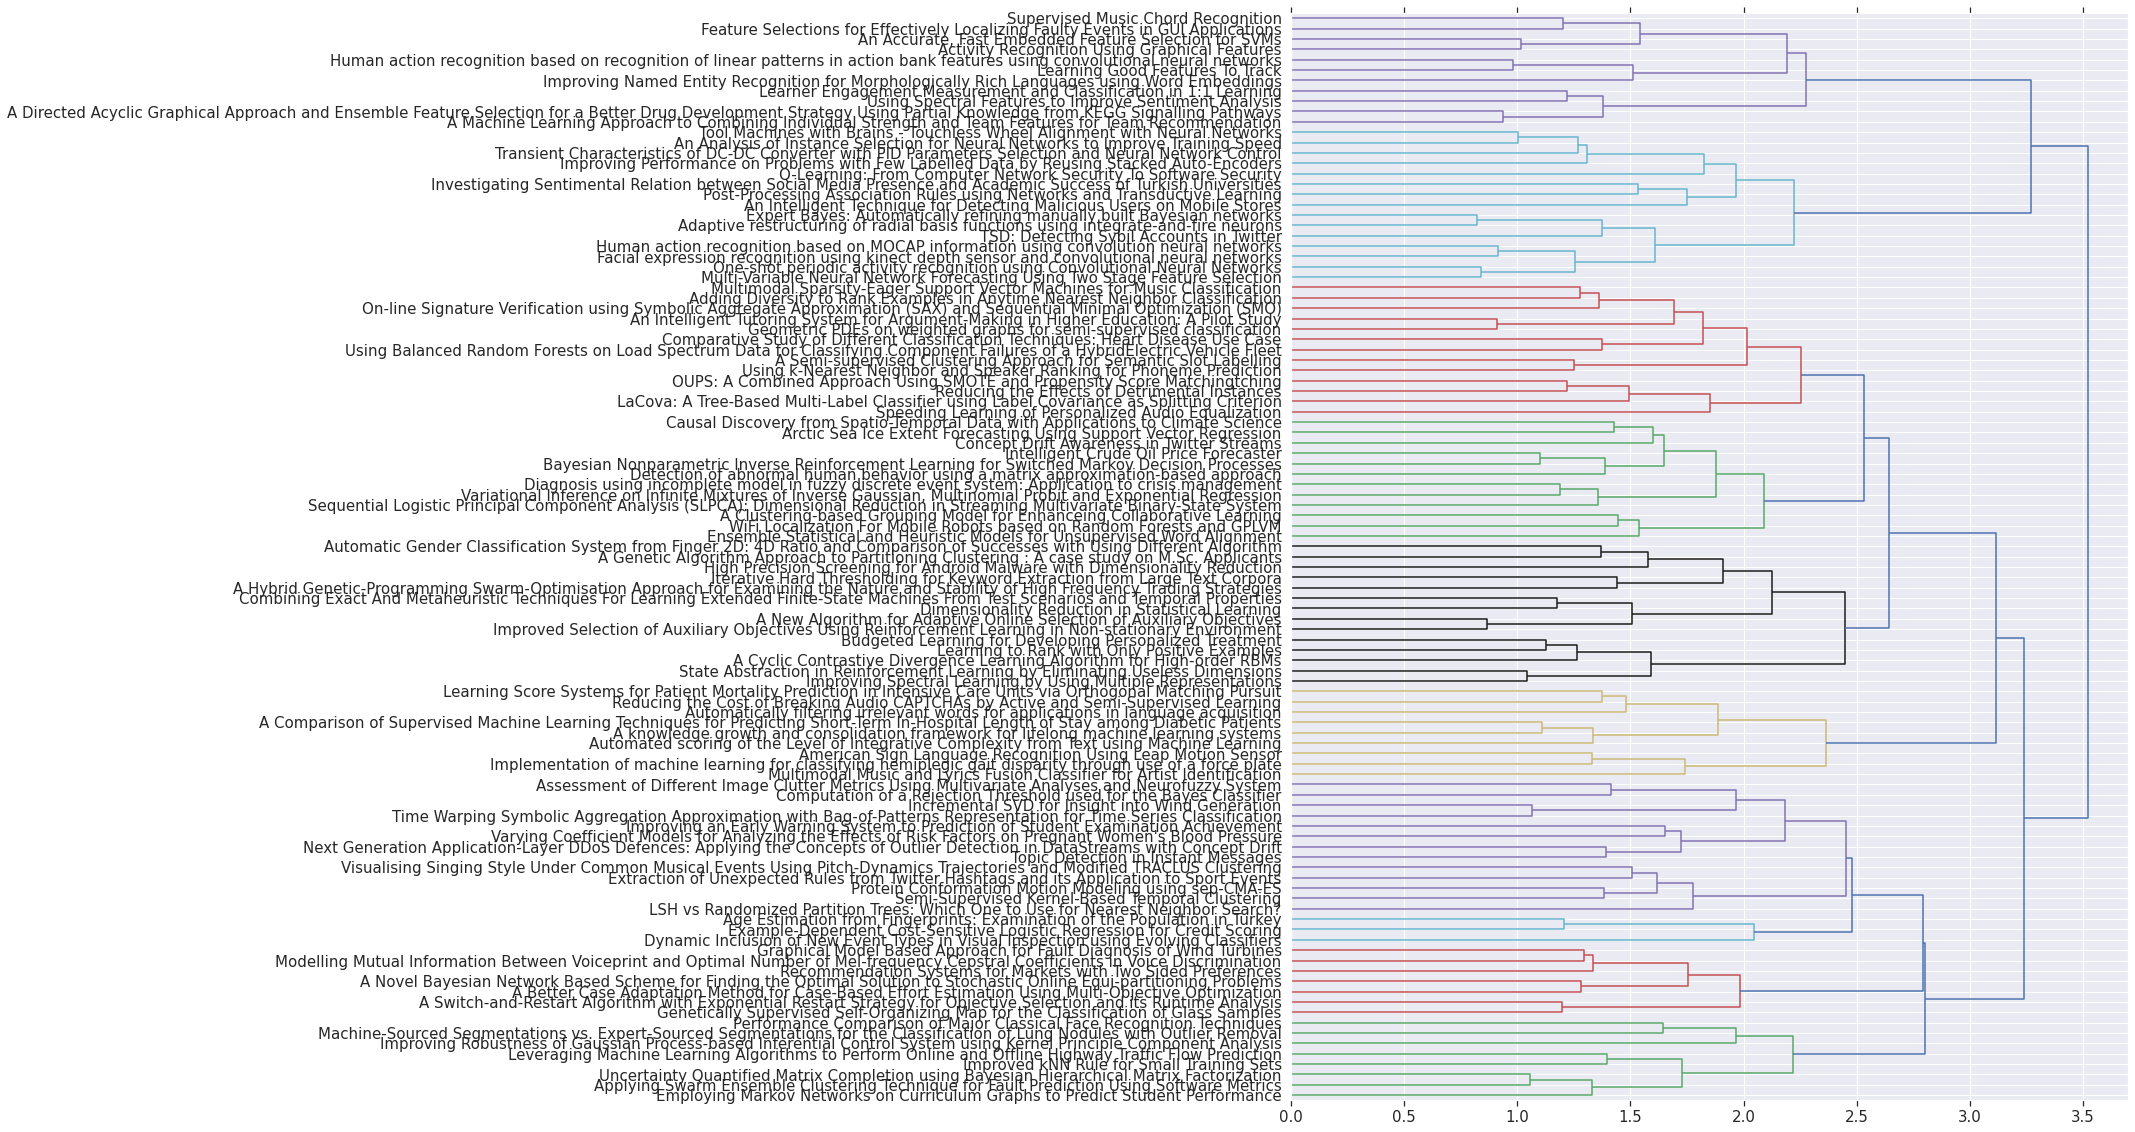

In [44]:
# using pre-clustering to determine whether we need to preprocess data using another method
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=paper_titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',          # changes apply to the y-axis
    labelsize=15
    )

plt.tight_layout() #show plot with tight layout

#save figure as ward_clusters
plt.savefig('ward_clusters.png', dpi=200) 

In [45]:
# convert tfidf_matrix to np.array
wv_matrix = tfidf_matrix.toarray()
wv_matrix[0]

array([0.        , 0.33022583, 0.        , 0.        , 0.        ,
       0.28641132, 0.36104585, 0.        , 0.        , 0.        ,
       0.        , 0.17172694, 0.23003585, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15598032,
       0.        , 0.16909473, 0.        , 0.        , 0.34124443,
       0.45499257, 0.        , 0.16083463, 0.        , 0.09143239,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12034862, 0.        , 0.11127764, 0.        , 0.16339838,
       0.1688358 , 0.        , 0.32166926, 0.        ])

In [46]:
# convert np.array to dataframe
wv_df = pd.DataFrame(wv_matrix)
wv_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.330226,0.000000,0.00000,0.0,0.286411,0.361046,0.000000,0.000000,0.000000,0.0,0.171727,0.230036,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.155980,0.00000,0.169095,0.000000,0.000000,0.341244,0.454993,0.000000,0.160835,0.000000,0.091432,0.000000,0.000000,0.000000,0.0,0.0,0.120349,0.00000,0.111278,0.000000,0.163398,0.168836,0.0,0.321669,0.000000
1,0.000000,0.116281,0.000000,0.00000,0.0,0.302559,0.000000,0.000000,0.000000,0.157710,0.0,0.181409,0.000000,0.0,0.000000,0.00000,0.0,0.184598,0.0,0.164774,0.00000,0.803826,0.000000,0.000000,0.120161,0.120161,0.000000,0.000000,0.000000,0.096587,0.000000,0.000000,0.000000,0.0,0.0,0.127134,0.00000,0.117551,0.172610,0.000000,0.000000,0.0,0.000000,0.178354
2,0.128434,0.173042,0.128434,0.13498,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.180812,0.0,0.126419,0.00000,0.0,0.000000,0.0,0.245206,0.00000,0.000000,0.000000,0.000000,0.178816,0.089408,0.000000,0.000000,0.274707,0.071867,0.000000,0.758511,0.000000,0.0,0.0,0.094596,0.13498,0.000000,0.000000,0.128434,0.265415,0.0,0.000000,0.000000
3,0.000000,0.262677,0.000000,0.00000,0.0,0.227825,0.000000,0.113912,0.000000,0.118755,0.0,0.273199,0.457453,0.0,0.000000,0.12597,0.0,0.139001,0.0,0.000000,0.00000,0.269011,0.115479,0.132094,0.180961,0.180961,0.000000,0.000000,0.000000,0.072730,0.000000,0.000000,0.124074,0.0,0.0,0.000000,0.00000,0.088515,0.519898,0.000000,0.000000,0.0,0.255870,0.000000
4,0.000000,0.000000,0.135102,0.00000,0.0,0.118407,0.000000,0.000000,0.135102,0.000000,0.0,0.000000,0.000000,0.0,0.265965,0.00000,0.0,0.000000,0.0,0.000000,0.26188,0.489343,0.000000,0.000000,0.094050,0.658352,0.274611,0.000000,0.000000,0.075599,0.110906,0.000000,0.128969,0.0,0.0,0.099508,0.00000,0.092008,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


### Classes and functions rebuild

We designed a new class of gridsearch in order to meet the requirements of our assignment.

The more concise and convenient the invocation, the more complicated the design behind it, and greater the effort as well.

 Just like the design of iPhone.

In [0]:
# K means clustering algorithm
class KMeansClustering():

  # initiate construction function
  def __init__(self, k_numbers=1, similarity='euclidean', convergence_threshold = 0.01):
    self.Data = None
    self.k = k_numbers
    self.similarity = similarity
    self.centroids = None
    self.DataDistributed = None
    self.convergence_threshold = convergence_threshold
    self.labels_ = None

    # sub-process
    self.centroids_iteration = list()
    self.DataDistributed_iteration = list()
    self.centroids_moving_distance = list()
  

  # initate k numbers of centroids
  def generate_initial_centroids(self):
    # automatically generate initial centroids
    i = 0
    centroids = list()
    while(i < self.k):
      centroid = dict()
      for column in self.Data.columns:
        # randomly generate a value in the range of column
        centroid[column] = float("{:.4f}".format(uniform(self.Data[column].min(0), self.Data[column].max(0))))
      centroids.append(centroid)
      i += 1
    # after generating centroids
    self.centroids = pd.DataFrame(centroids)
    return self.centroids

  # initate k numbers of centroids within existed points
  def generate_existed_centroids(self):
    # automatically generate initial centroids
    i = 0
    centroids = list()
    while(i < self.k):
      centroid = dict()
      centroid = self.Data.iloc[randint(0, len(self.Data) - 1)]
      centroids.append(centroid)
      i += 1
    # after generating centroids
    self.centroids = pd.DataFrame(centroids).reset_index(drop=True)
    return self.centroids


  # assign points to a cluster located by a centroid
  def assign_points(self):
    # create a list to store the closest distance
    distance_list = list()
    cluster_index = list()
    # iteration of rows(each point) in dataset
    for index_point, point in self.Data.iterrows():
      closest_distance = -1
      distributed_centroid = -1
      # for each point, calculate the distance from it to a centroid
      for index_centroid, centroid in self.centroids.iterrows():
        # ------ select distance type ------#
        # select distance type
        if self.similarity == "euclidean":
          distance = self.euclidean_distance(point, centroid)
        elif self.similarity == "manhattan":
          distance = self.manhattan_distance(point, centroid)
        elif self.similarity == "minkowski":
          distance = self.minkowski_distance(point, centroid)
        elif self.similarity == "cosine":
          distance = self.cosine_distance(point, centroid)
        else:
          # throw out a warning
          distance = -1
        # ------ -------------------- ------#
        # judge if new distance is closer than existing one
        if closest_distance == -1 or distance < closest_distance:
          # if it's true then update distance
          closest_distance = distance
          distributed_centroid = index_centroid
      # append distance to storeage list
      distance_list.append(closest_distance)
      cluster_index.append(distributed_centroid)
    # Add the cloest distance as a column to Dataframe
    # Using copy() to avoid build a pointer between Data and DataDistributed
    self.DataDistributed = self.Data.copy()
    self.DataDistributed['Distance'] = distance_list
    self.DataDistributed['Cluster_index'] = cluster_index
    return self.DataDistributed


  # generate empty centroid data structure
  def generate_empty_centroids(self):
    # automatically generate initial centroids
    i = 0
    centroids = list()
    while(i < self.k):
      centroid = dict()
      for column in self.Data.columns:
        # randomly generate a value in the range of column
        centroid[column] = float(0.0)
      centroids.append(centroid)
      i += 1
    return pd.DataFrame(centroids)
  

  # recalculate the centroid
  def recalculate_centroid(self):
    # recalculate centroids groupby previous clusters
    # avoid Cluster_index become a new index
    new_centroids = self.DataDistributed.groupby(['Cluster_index'], as_index=False).mean().round(4)
    # drop middle-process columns
    self.centroids = new_centroids.drop('Cluster_index', 1).drop('Distance', 1)
    return self.centroids
  

  # main process of the whole training
  def fit(self, Data):
    # save data to model
    self.Data = Data

    # randomly generate k centroids
    # self.generate_initial_centroids()
    # generate centroids among existed points
    self.generate_existed_centroids()
    # print(self.centroids)
    self.centroids_iteration.append(self.centroids.copy())
    
    convergence = False
    # iterate until meet convergence condition
    while convergence == False:
      # assign points to these centroids
      self.assign_points()
      self.DataDistributed_iteration.append(self.DataDistributed.copy())
      # take the previous centroids
      previous_centroids = self.centroids.copy()
      # recalculate the centroids
      self.recalculate_centroid()
      new_centroids = self.centroids.copy()
      self.centroids_iteration.append(self.centroids.copy())

      # judge if meeting convergence condition
      centroids_movements = dict()
      for index, centroid in self.centroids.iterrows():
        convergence = True
        # ------ select distance type ------#
        if self.similarity == "euclidean":
          centroid_movement = self.euclidean_distance(previous_centroids.iloc[index], new_centroids.iloc[index])
        elif self.similarity == "manhattan":
          centroid_movement = self.manhattan_distance(previous_centroids.iloc[index], new_centroids.iloc[index])
        elif self.similarity == "minkowski":
          centroid_movement = self.minkowski_distance(previous_centroids.iloc[index], new_centroids.iloc[index])
        elif self.similarity == "cosine":
          centroid_movement = self.cosine_distance(previous_centroids.iloc[index], new_centroids.iloc[index])
        # ------ -------------------- ------#
        centroids_movements[index] = centroid_movement
        if centroid_movement >= self.convergence_threshold:
          convergence = False
      # record movement
      self.centroids_moving_distance.append(centroids_movements)
    self.labels_ = self.DataDistributed['Cluster_index'].to_numpy()
    

  # euclidean distance
  def euclidean_distance(self, pointA, pointB):
    sum_of_square = 0.0
    for column in self.Data.columns:
      sum_of_square += (pointA[column] - pointB[column])**2
    euclidean_distance = math.sqrt(sum_of_square)
    return float("{:.4f}".format(euclidean_distance))


  # manhattan distance
  def manhattan_distance(self, pointA, pointB):
    sum_of_abs = 0.0
    for column in self.Data.columns:
      sum_of_abs += abs(pointA[column] - pointB[column])
    manhattan_distance = sum_of_abs
    return float("{:.4f}".format(manhattan_distance))


  # Minkowski distance
  def minkowski_distance(self, pointA, pointB):
    # get degree of features
    degree = len(self.Data.columns)
    sum_of_poly_item = 0.0
    for column in self.Data.columns:
      sum_of_poly_item += pow(float("{:.4f}".format(pointA[column] - pointB[column])), degree)
    minkowski_distance = pow(sum_of_poly_item, 1/degree)
    return float("{:.4f}".format(minkowski_distance))
  

  # Cosine distance
  def cosine_distance(self, pointA, pointB):
    sum_of_dot_product = 0.0
    sum_of_square_pointA = 0.0
    sum_of_square_pointB = 0.0
    for column in self.Data.columns:
      sum_of_dot_product += pointA[column] * pointB[column]
      sum_of_square_pointA += pow(pointA[column], 2)
      sum_of_square_pointB += pow(pointB[column], 2)
    norm_of_pointA = math.sqrt(sum_of_square_pointA)
    norm_of_pointB = math.sqrt(sum_of_square_pointB)
    cosine_distance = sum_of_dot_product / (norm_of_pointA * norm_of_pointB)
    return float("{:.4f}".format(cosine_distance))

Rewrite the Gridsearch Function

In [0]:
# write a new gridsearch class to handle our problem
class GridSearch():

  # class initiate
  def __init__(self, cluster_type, param_grid, score_type):
    self.Data = None
    self.param_grid = param_grid
    self.score_list = list()
    self.cluster_type = cluster_type
    self.score_type = score_type

  # run all combinations of parameters
  def fit(self, Data):
    # load data
    self.Data = Data
    if self.cluster_type == 'AgglomerativeClustering':
      self.__agglomerative_clustering()
    elif self.cluster_type == 'DBSCAN':
      self.__dbscan_clustering()
    elif self.cluster_type == 'KMeansClustering':
      self.__kmeans_clustering()
    # return the result list
    return "Grid Search Completed. Plase use get_results() to get best param combination."


  # KmeansClustering
  def __kmeans_clustering(self):
    # use all combinations of parameters to cluster
    for k in self.param_grid['k_numbers']:
      for similarity in self.param_grid['similarity']:
        score_dict = dict()
        # create new model using different params and evaluate through silouette score
        kmeans_model = KMeansClustering(k_numbers=k, similarity=similarity, convergence_threshold=0.01)
        kmeans_model.fit(self.Data)
        labels = kmeans_model.labels_
        print('k=', k, ', similarity=',similarity)
        # select different evaluation type
        if self.score_type == 'silhouette_score':
          # affinity of silhouette score should be consistent with similarity
          score = silhouette_score(self.Data, labels, metric=similarity)
        elif self.score_type == 'calinski_harabasz_score':
          score = calinski_harabasz_score(self.Data, labels=labels)
        elif self.score_type == 'davies_bouldin_score':
          score = davies_bouldin_score(self.Data, labels=labels)
        # save result to score_dict
        score_dict['k_numbers'] = k
        score_dict['similarity'] = similarity
        score_dict['score_type'] = self.score_type
        score_dict['score'] = score
        self.score_list.append(score_dict)
    # sorting the list by evaluation result
    self.score_list.sort(reverse=True, key=self.__sort_metric)

  
  # DBSCAN
  def __dbscan_clustering(self):
    # use all combinations of parameters to cluster
    for eps in self.param_grid['eps']:
      for min_samples in self.param_grid['min_samples']:
        for metric in self.param_grid['metric']:
          score_dict = dict()
          # create new model using different params and evaluate through silouette score
          dbscan_model = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
          dbscan_model.fit(self.Data)
          labels = dbscan_model.labels_
          Data_with_label = self.Data.copy()
          Data_with_label['label'] = labels
          # Because all noise will be labeled as -1, thus we need to avoid them
          # We can set a percentage threshold to fliter the results
          # count number of noise
          Data_purified = Data_with_label.copy()
          noise_count = 0
          only_one_type = True
          for index, row in Data_purified.iterrows():
            if row['label'] == -1:
              noise_count += 1
              Data_purified.drop(index, 0)
            if row['label'] == 1:
              only_one_type=False
          # if ratio the ratio is too low, then give up the result of this iteration
          noise_ratio = noise_count / len(labels)
          # if there are not only one cluster:
          if only_one_type == False:
            # select different evaluation type
            if self.score_type == 'silhouette_score':
              # affinity of silhouette score should be consistent with similarity
              score = silhouette_score(Data_purified, labels=Data_purified['label'], metric=metric)
            elif self.score_type == 'calinski_harabasz_score':
              score = calinski_harabasz_score(Data_purified, labels=Data_purified['label'])
            elif self.score_type == 'davies_bouldin_score':
              score = davies_bouldin_score(Data_purified, labels=Data_purified['label'])
          else:
            score = -1
          # save result to score_dict
          score_dict['eps'] = eps
          score_dict['min_samples'] = min_samples
          score_dict['metric'] = metric
          score_dict['score_type'] = self.score_type
          score_dict['noise_ratio'] = noise_ratio
          score_dict['score'] = score
          self.score_list.append(score_dict)
    # sorting the list by evaluation result
    self.score_list.sort(reverse=True, key=self.__sort_metric)
  
  
  # AgglomerativeClustering
  def __agglomerative_clustering(self):
    # use all combinations of parameters to cluster
    for n_clusters in self.param_grid['n_clusters']:
      for linkage in self.param_grid['linkage']:
        for affinity in self.param_grid['affinity']:
          score_dict = dict()
          # create new model using different params and evaluate through silouette score
          hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
          hierarchical_model.fit(self.Data)
          labels = hierarchical_model.labels_
          # select different evaluation type
          if self.score_type == 'silhouette_score':
            # affinity of silhouette score should be consistent with similarity
            score = silhouette_score(self.Data, labels, metric=affinity)
          elif self.score_type == 'calinski_harabasz_score':
            score = calinski_harabasz_score(self.Data, labels=labels)
          elif self.score_type == 'davies_bouldin_score':
            score = davies_bouldin_score(self.Data, labels=labels)
          # save result to score_dict
          score_dict['n_clusters'] = n_clusters
          score_dict['linkage'] = linkage
          score_dict['affinity'] = affinity
          score_dict['score_type'] = self.score_type
          score_dict['score'] = score
          self.score_list.append(score_dict)
    # sorting the list by evaluation result
    self.score_list.sort(reverse=True, key=self.__sort_metric)

  
  def get_param_grid(self):
    return self.param_grid

  # get param combination with best score
  def get_best_param(self):
    return self.score_list[0]

  # get all results
  def get_results(self):
    return self.score_list

  def __sort_metric(self, score_dict):
    return score_dict['score']


# KMeansClustering

## 2.1 Travel Review Dataset

In [0]:
# confrim our dataset before training
TA_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


Preview elbow point before fit the model using the code given by tutorial

In [0]:
# Kmeans implementation in sklearn using 'Euclidean distance'
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(TA_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

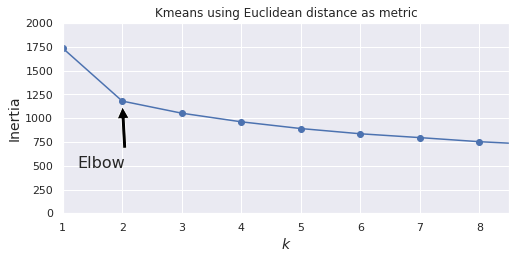

In [0]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.15, 0.35),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 2000])
plt.title('Kmeans using Euclidean distance as metric')
plt.show()

Clustering Model - Build and Train

In [0]:
Kmeans_model = KMeansClustering(k_numbers=2, similarity='euclidean')
Kmeans_model.fit(TA_data)

In [0]:
# Data process before plot
centroids = Kmeans_model.centroids.copy()
TA_data_clustered = Kmeans_model.DataDistributed.copy()
TA_data_clustered = TA_data_clustered.drop(['Distance'], 1)
centroids['Cluster_index'] = [0, 1]
TA_data_clustered.head(3)
TA_data_clustered_with_centroids = TA_data_clustered.copy()
TA_data_clustered_with_centroids = TA_data_clustered_with_centroids.append(centroids, ignore_index=True)

Now, let's see the final cluster result

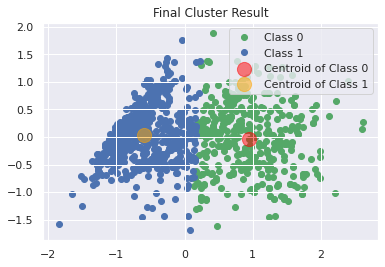

In [0]:
# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
pca.fit(TA_data_clustered_with_centroids.drop(['Cluster_index'], 1))
X_pca = pca.transform(TA_data_clustered_with_centroids.drop(['Cluster_index'], 1))

# Plotting the results of PCA
plt.plot(X_pca[TA_data_clustered_with_centroids['Cluster_index'] == 0, 0], X_pca[TA_data_clustered_with_centroids['Cluster_index'] == 0, 1], 'go', label='Class 0', zorder=0)
plt.plot(X_pca[TA_data_clustered_with_centroids['Cluster_index'] == 1, 0], X_pca[TA_data_clustered_with_centroids['Cluster_index'] == 1, 1], 'bo', label='Class 1', zorder=0)

# Plotting centroids of each cluster
plt.scatter(X_pca[TA_data_clustered_with_centroids.index == 980, 0], X_pca[TA_data_clustered_with_centroids.index == 980, 1], c='red', s=200, alpha=0.5, label='Centroid of Class 0', zorder=10)
plt.scatter(X_pca[TA_data_clustered_with_centroids.index == 981, 0], X_pca[TA_data_clustered_with_centroids.index == 981, 1], c='orange', s=200, alpha=0.5, label='Centroid of Class 1', zorder=10)

plt.title('Final Cluster Result')
plt.legend(loc=0);

The most awesome thing of our rebuilted KmeansClustering function is that we can see the history of each step forming the final cluster

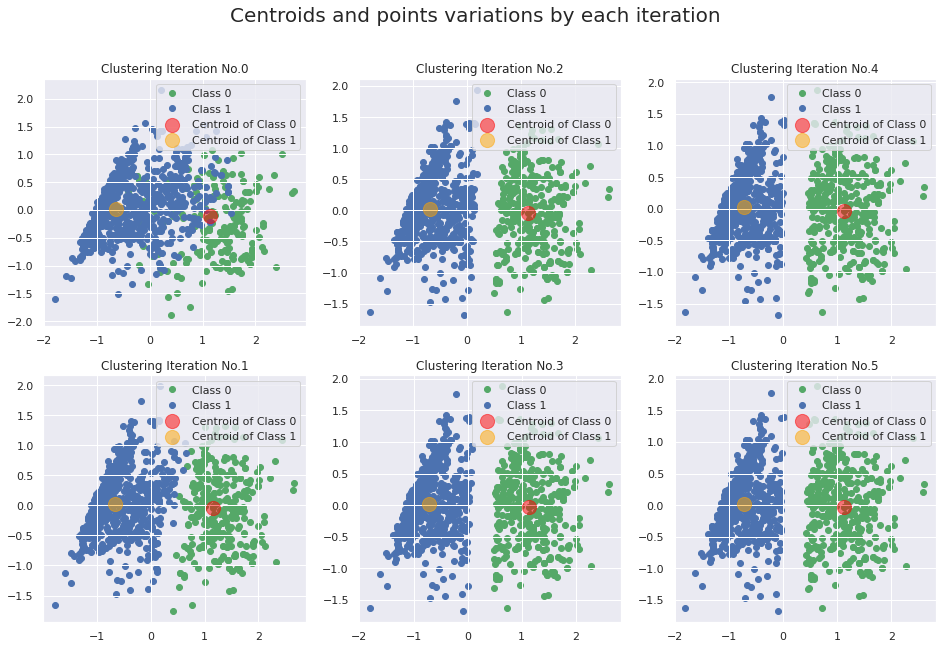

In [0]:
# get centroid and cluster veriation from our Class
cluster_process = Kmeans_model.DataDistributed_iteration.copy()
centroids_process = Kmeans_model.centroids_iteration.copy()

# Plot function
def plot_cluster_result(iteration_number, ax, iteration, centroid):

  iteration = iteration.drop(['Distance'], 1)
  centroid['Cluster_index'] = [0, 1]
  iteration_with_centroids = iteration.copy()
  iteration_with_centroids = iteration_with_centroids.append(centroids, ignore_index=True)

  pca = decomposition.PCA(n_components=2)
  pca.fit(iteration_with_centroids)
  X_pca = pca.transform(iteration_with_centroids)

  # Plotting the results of PCA
  ax.plot(X_pca[iteration_with_centroids['Cluster_index'] == 0, 0], X_pca[iteration_with_centroids['Cluster_index'] == 0, 1], 'go', label='Class 0', zorder=0)
  ax.plot(X_pca[iteration_with_centroids['Cluster_index'] == 1, 0], X_pca[iteration_with_centroids['Cluster_index'] == 1, 1], 'bo', label='Class 1', zorder=0)

  # Plotting centroids of each cluster
  ax.scatter(X_pca[iteration_with_centroids.index == 980, 0], X_pca[iteration_with_centroids.index == 980, 1], c='red', s=200, alpha=0.5, label='Centroid of Class 0', zorder=10)
  ax.scatter(X_pca[iteration_with_centroids.index == 981, 0], X_pca[iteration_with_centroids.index == 981, 1], c='orange', s=200, alpha=0.5, label='Centroid of Class 1', zorder=10)
  
  ax.set_title('Clustering Iteration No.' + str(iteration_number))
  ax.legend(loc=0);

# Set sub plot
fig, ax = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Centroids and points variations by each iteration', size=20);

# Plot by iterations
for j in range(0, 3):
  scale = 2 * j
  for i in range(0, 2):
    index = scale + i
    plot_cluster_result(index, ax[i][j], cluster_process[index], centroids_process[index])


### Evaluations

Because cluster is an unsupervised machine learning method, that means we don't have given labels to check if points are distributed correct, thus we can only use internal evaluation method to decide the performance of cluster results.

In [0]:
# set parameter grid
# Through the graph above, we can assume that the best numbers of k = 2
# Let's see if it's true through different evalutions
param_grid_kmeans_ta = {
    'k_numbers': [2, 3, 4, 5, 6],
    'similarity': ['euclidean', 'manhattan', 'minkowski'],
}


1. Evaluation with Silhouette Score

In [30]:
# init gridsearch model using our function
gridsearch_model_kmeans = GridSearch(
    cluster_type = 'KMeansClustering',
    param_grid = param_grid_kmeans_ta,
    score_type = 'silhouette_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_kmeans.fit(TA_data)

k= 2  ,similarity= euclidean
k= 2  ,similarity= manhattan
k= 2  ,similarity= minkowski
k= 3  ,similarity= euclidean
k= 3  ,similarity= manhattan
k= 3  ,similarity= minkowski
k= 4  ,similarity= euclidean
k= 4  ,similarity= manhattan
k= 4  ,similarity= minkowski
k= 5  ,similarity= euclidean
k= 5  ,similarity= manhattan
k= 5  ,similarity= minkowski
k= 6  ,similarity= euclidean
k= 6  ,similarity= manhattan
k= 6  ,similarity= minkowski


'Grid Search Completed. Plase use get_results() to get best param combination.'

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model_kmeans.get_results()
kmeans_results = sorted(kmeans_results, key=lambda item: item['k_numbers']) 

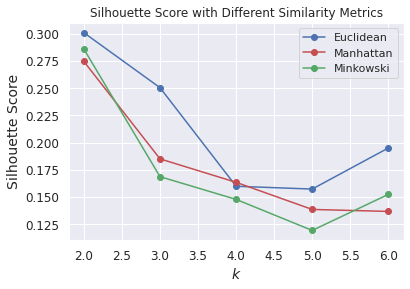

In [123]:
# Get silhouette scores seprated by similarity metrics
silhouette_score_euc = [item['score'] for item in kmeans_results if item['similarity'] == 'euclidean']
silhouette_score_man = [item['score'] for item in kmeans_results if item['similarity'] == 'manhattan']
silhouette_score_min = [item['score'] for item in kmeans_results if item['similarity'] == 'minkowski']

# Plot our silhouette scores
plt.plot(range(2, 7), silhouette_score_euc, "bo-", label="Euclidean")
plt.plot(range(2, 7), silhouette_score_man, "ro-", label='Manhattan')
plt.plot(range(2, 7), silhouette_score_min, "go-", label='Minkowski')

plt.title('Silhouette Score with Different Similarity Metrics')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);

2. Evaluation with Calinski Harabasz Score

In [35]:
# set param_grid
param_grid_kmeans_ch = {
    'k_numbers': [2, 3, 4, 5, 6],
    'similarity': ['euclidean', 'manhattan', 'minkowski'],
}

# init gridsearch model using our function
gridsearch_model_kmeans_ch = GridSearch(
    cluster_type = 'KMeansClustering',
    param_grid = param_grid_kmeans_ch,
    score_type = 'calinski_harabasz_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_kmeans_ch.fit(TA_data)

k= 2 , similarity= euclidean
k= 2 , similarity= manhattan
k= 2 , similarity= minkowski
k= 3 , similarity= euclidean
k= 3 , similarity= manhattan
k= 3 , similarity= minkowski
k= 4 , similarity= euclidean
k= 4 , similarity= manhattan
k= 4 , similarity= minkowski
k= 5 , similarity= euclidean
k= 5 , similarity= manhattan
k= 5 , similarity= minkowski
k= 6 , similarity= euclidean
k= 6 , similarity= manhattan
k= 6 , similarity= minkowski


'Grid Search Completed. Plase use get_results() to get best param combination.'

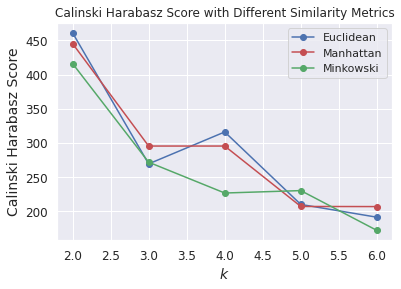

In [121]:
# get gridsearch results
kmeans_results = gridsearch_model_kmeans_ch.get_results()
kmeans_results = sorted(kmeans_results, key=lambda item: item['k_numbers']) 

# Get silhouette scores seprated by similarity metrics
ch_score_euc = [item['score'] for item in kmeans_results if item['similarity'] == 'euclidean']
ch_score_man = [item['score'] for item in kmeans_results if item['similarity'] == 'manhattan']
ch_score_min = [item['score'] for item in kmeans_results if item['similarity'] == 'minkowski']

# Plot our silhouette scores
plt.plot(range(2, 7), ch_score_euc, "bo-", label="Euclidean")
plt.plot(range(2, 7), ch_score_man, "ro-", label='Manhattan')
plt.plot(range(2, 7), ch_score_min, "go-", label='Minkowski')

plt.title('Calinski Harabasz Score with Different Similarity Metrics')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Calinski Harabasz Score", fontsize=14)
plt.legend(loc=0);

## 2.2 ICMLA Dataset

In [47]:
# Have a brief view again
wv_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.000000,0.330226,0.000000,0.00000,0.0,0.286411,0.361046,0.000000,0.000000,0.000000,0.0,0.171727,0.230036,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.155980,0.00000,0.169095,0.000000,0.000000,0.341244,0.454993,0.000000,0.160835,0.000000,0.091432,0.000000,0.000000,0.000000,0.0,0.0,0.120349,0.00000,0.111278,0.000000,0.163398,0.168836,0.0,0.321669,0.000000
1,0.000000,0.116281,0.000000,0.00000,0.0,0.302559,0.000000,0.000000,0.000000,0.157710,0.0,0.181409,0.000000,0.0,0.000000,0.00000,0.0,0.184598,0.0,0.164774,0.00000,0.803826,0.000000,0.000000,0.120161,0.120161,0.000000,0.000000,0.000000,0.096587,0.000000,0.000000,0.000000,0.0,0.0,0.127134,0.00000,0.117551,0.172610,0.000000,0.000000,0.0,0.000000,0.178354
2,0.128434,0.173042,0.128434,0.13498,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.180812,0.0,0.126419,0.00000,0.0,0.000000,0.0,0.245206,0.00000,0.000000,0.000000,0.000000,0.178816,0.089408,0.000000,0.000000,0.274707,0.071867,0.000000,0.758511,0.000000,0.0,0.0,0.094596,0.13498,0.000000,0.000000,0.128434,0.265415,0.0,0.000000,0.000000
3,0.000000,0.262677,0.000000,0.00000,0.0,0.227825,0.000000,0.113912,0.000000,0.118755,0.0,0.273199,0.457453,0.0,0.000000,0.12597,0.0,0.139001,0.0,0.000000,0.00000,0.269011,0.115479,0.132094,0.180961,0.180961,0.000000,0.000000,0.000000,0.072730,0.000000,0.000000,0.124074,0.0,0.0,0.000000,0.00000,0.088515,0.519898,0.000000,0.000000,0.0,0.255870,0.000000
4,0.000000,0.000000,0.135102,0.00000,0.0,0.118407,0.000000,0.000000,0.135102,0.000000,0.0,0.000000,0.000000,0.0,0.265965,0.00000,0.0,0.000000,0.0,0.000000,0.26188,0.489343,0.000000,0.000000,0.094050,0.658352,0.274611,0.000000,0.000000,0.075599,0.110906,0.000000,0.128969,0.0,0.0,0.099508,0.00000,0.092008,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


## Data Training

In [83]:
# Set parameter grid
parameters_kmeans_icmla = {
    'k_numbers': [2, 3, 4, 5, 6],
    'similarity': ['euclidean', 'manhattan'],
}

gridsearch_model = GridSearch(
    'KMeansClustering', 
    parameters_kmeans_icmla,
    'silhouette_score'
)

# fit with Word Vector Matrix dataset
gridsearch_model.fit(wv_df)

k= 2 , similarity= euclidean
k= 2 , similarity= manhattan
k= 3 , similarity= euclidean
k= 3 , similarity= manhattan
k= 4 , similarity= euclidean
k= 4 , similarity= manhattan
k= 5 , similarity= euclidean
k= 5 , similarity= manhattan
k= 6 , similarity= euclidean
k= 6 , similarity= manhattan


'Grid Search Completed. Plase use get_results() to get best param combination.'

## 1. Evalution with Silhouette Score

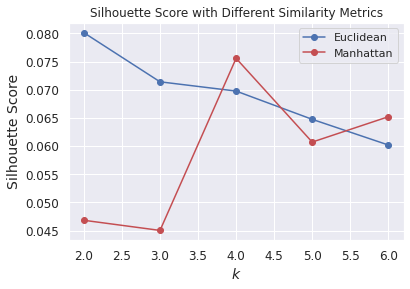

In [119]:
# get gridsearch results
kmeans_results = gridsearch_model.get_results()
kmeans_results = sorted(kmeans_results, key=lambda item: item['k_numbers']) 

# Get silhouette scores seprated by similarity metrics
silhouette_score_euc = [item['score'] for item in kmeans_results if item['similarity'] == 'euclidean']
silhouette_score_man = [item['score'] for item in kmeans_results if item['similarity'] == 'manhattan']

# Plot our silhouette scores
plt.plot(range(2, 7), silhouette_score_euc, "bo-", label="Euclidean")
plt.plot(range(2, 7), silhouette_score_man, "ro-", label='Manhattan')

plt.title('Silhouette Score with Different Similarity Metrics')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);

## 2. Evalution with Davies Douldin Score

In [116]:
# Set parameter grid
parameters_kmeans = {
    'k_numbers': [2, 3, 4, 5, 6],
    'similarity': ['manhattan', 'euclidean'],
}

gridsearch_model_db = GridSearch(
    'KMeansClustering', 
    parameters_kmeans,
    'davies_bouldin_score')

# fit with Word Vector Matrix dataset
gridsearch_model_db.fit(wv_df)

k= 2 , similarity= manhattan
k= 2 , similarity= euclidean
k= 3 , similarity= manhattan
k= 3 , similarity= euclidean
k= 4 , similarity= manhattan
k= 4 , similarity= euclidean
k= 5 , similarity= manhattan
k= 5 , similarity= euclidean
k= 6 , similarity= manhattan
k= 6 , similarity= euclidean


'Grid Search Completed. Plase use get_results() to get best param combination.'

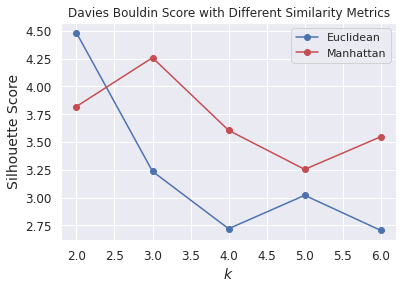

In [120]:
# get gridsearch results
kmeans_results = gridsearch_model_db.get_results()
kmeans_results = sorted(kmeans_results, key=lambda item: item['k_numbers']) 

# Get silhouette scores seprated by similarity metrics
db_score_euc = [item['score'] for item in kmeans_results if item['similarity'] == 'euclidean']
db_score_man = [item['score'] for item in kmeans_results if item['similarity'] == 'manhattan']

# Plot our silhouette scores
plt.plot(range(2, 7), db_score_euc, "bo-", label="Euclidean")
plt.plot(range(2, 7), db_score_man, "ro-", label='Manhattan')

plt.title('Davies Bouldin Score with Different Similarity Metrics')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);



---


# 3. Hierachical Clustering

## 3.1 Travel Review Dataset

### Data training

In [87]:
# set parameters
# using gridsearch methodology to handle our problems
param_grid_agglo = {
    'n_clusters': [2,3,4,5,6,7,8,9,10],
    'linkage': ['single', 'average', 'complete'],
    'affinity': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']
}

# init gridsearch model using our function
gridsearch_model_agglo = GridSearch(
    cluster_type = 'AgglomerativeClustering',
    param_grid = param_grid_agglo,
    score_type = 'silhouette_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_agglo.fit(TA_data)

'Grid Search Completed. Plase use get_results() to get best param combination.'

In [125]:
# Have a brief view of the best 3 score
kmeans_results = gridsearch_model_agglo.get_results()
kmeans_results[:3]

[{'affinity': 'cosine',
  'linkage': 'average',
  'n_clusters': 2,
  'score': 0.5775644930103881,
  'score_type': 'silhouette_score'},
 {'affinity': 'cosine',
  'linkage': 'single',
  'n_clusters': 2,
  'score': 0.5752171853778129,
  'score_type': 'silhouette_score'},
 {'affinity': 'manhattan',
  'linkage': 'average',
  'n_clusters': 2,
  'score': 0.4243376453558286,
  'score_type': 'silhouette_score'}]

In [95]:
# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['n_clusters']) 
kmeans_results[:3]

[{'affinity': 'cosine',
  'linkage': 'average',
  'n_clusters': 2,
  'score': 0.5775644930103881,
  'score_type': 'silhouette_score'},
 {'affinity': 'cosine',
  'linkage': 'single',
  'n_clusters': 2,
  'score': 0.5752171853778129,
  'score_type': 'silhouette_score'},
 {'affinity': 'manhattan',
  'linkage': 'average',
  'n_clusters': 2,
  'score': 0.4243376453558286,
  'score_type': 'silhouette_score'}]

### 1.Evaluation - Silhouette Score

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model_agglo.get_results()

# Data process for plot
# Euclidean
silhouette_score_euc_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'average')]
silhouette_score_euc_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'complete')]
silhouette_score_euc_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'single')]

# Manhattan
silhouette_score_man_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'average')]
silhouette_score_man_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'complete')]
silhouette_score_man_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'single')]

# Cosine
silhouette_score_cos_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'average')]
silhouette_score_cos_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'complete')]
silhouette_score_cos_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'single')]


Evalution using silhouette score with different combinations

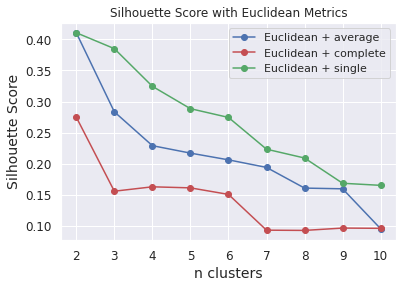

In [126]:
# Plot our silhouette scores
plt.plot(range(2, 11), silhouette_score_euc_average, "bo-", label='Euclidean + average')
plt.plot(range(2, 11), silhouette_score_euc_complete, "ro-", label='Euclidean + complete')
plt.plot(range(2, 11), silhouette_score_euc_single, "go-", label='Euclidean + single')

plt.title('Silhouette Score with Euclidean Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);

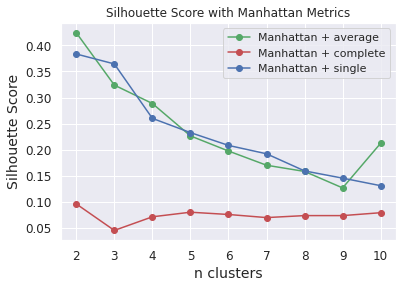

In [111]:
# Manhattan metrics
plt.plot(range(2, 11), silhouette_score_man_average, "go-", label="Manhattan + average")
plt.plot(range(2, 11), silhouette_score_man_complete, "ro-", label='Manhattan + complete')
plt.plot(range(2, 11), silhouette_score_man_single, "bo-", label='Manhattan + single')

plt.title('Silhouette Score with Manhattan Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);

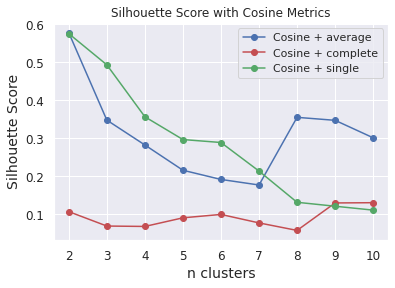

In [112]:
# Cosine metrics
plt.plot(range(2, 11), silhouette_score_cos_average, "bo-", label="Cosine + average")
plt.plot(range(2, 11), silhouette_score_cos_complete, "ro-", label='Cosine + complete')
plt.plot(range(2, 11), silhouette_score_cos_single, "go-", label='Cosine + single')

plt.title('Silhouette Score with Cosine Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(loc=0);

### 2. Evaluation - Calinski Harabasz Score

In [127]:
# set parameters
# using gridsearch methodology to handle our problems
param_grid_agglo = {
    'n_clusters': [2,3,4,5,6,7,8,9,10],
    'linkage': ['single', 'average', 'complete'],
    'affinity': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']
}

# init gridsearch model using our function
gridsearch_model_agglo = GridSearch(
    cluster_type = 'AgglomerativeClustering',
    param_grid = param_grid_agglo,
    score_type = 'calinski_harabasz_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_agglo.fit(TA_data)

'Grid Search Completed. Plase use get_results() to get best param combination.'

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model_agglo.get_results()

# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['n_clusters']) 

# Data process for plot
# Euclidean
ch_score_euc_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'average')]
ch_score_euc_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'complete')]
ch_score_euc_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'single')]

# Manhattan
ch_score_man_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'average')]
ch_score_man_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'complete')]
ch_score_man_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'single')]

# Cosine
ch_score_cos_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'average')]
ch_score_cos_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'complete')]
ch_score_cos_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'single')]

Euclidean

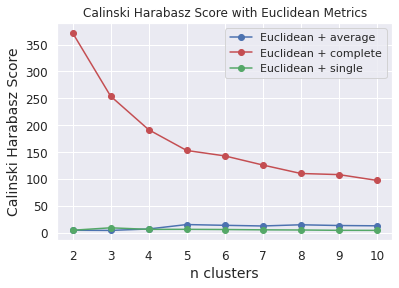

In [129]:
# Plot our silhouette scores
plt.plot(range(2, 11), ch_score_euc_average, "bo-", label='Euclidean + average')
plt.plot(range(2, 11), ch_score_euc_complete, "ro-", label='Euclidean + complete')
plt.plot(range(2, 11), ch_score_euc_single, "go-", label='Euclidean + single')

plt.title('Calinski Harabasz Score with Euclidean Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Calinski Harabasz Score", fontsize=14)
plt.legend(loc=0);

Manhattan

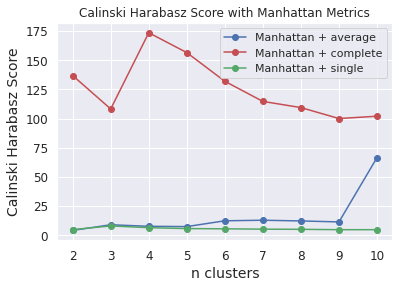

In [133]:
# Plot our silhouette scores
plt.plot(range(2, 11), ch_score_man_average, "bo-", label='Manhattan + average')
plt.plot(range(2, 11), ch_score_man_complete, "ro-", label='Manhattan + complete')
plt.plot(range(2, 11), ch_score_man_single, "go-", label='Manhattan + single')

plt.title('Calinski Harabasz Score with Manhattan Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Calinski Harabasz Score", fontsize=14)
plt.legend(loc=0);

Cosine

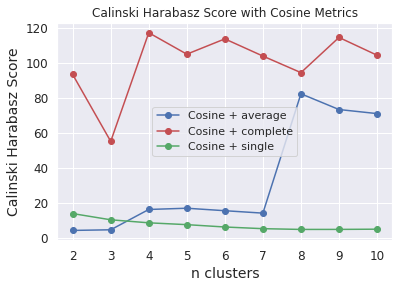

In [132]:
# Plot our silhouette scores
plt.plot(range(2, 11), ch_score_cos_average, "bo-", label='Cosine + average')
plt.plot(range(2, 11), ch_score_cos_complete, "ro-", label='Cosine + complete')
plt.plot(range(2, 11), ch_score_cos_single, "go-", label='Cosine + single')

plt.title('Calinski Harabasz Score with Cosine Metrics')
plt.xlabel("n clusters", fontsize=14)
plt.ylabel("Calinski Harabasz Score", fontsize=14)
plt.legend(loc=0);

## 3.2 ICMLA Dataset

### 3.2.1 Train Hierarchical clustering 

In [159]:
# set parameters
# using gridsearch methodology to handle our problems
param_grid_agglo = {
    'n_clusters': range(2, 20),
    'linkage': ['single', 'average', 'complete'],
    'affinity': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']
}

# init gridsearch model using our function
gridsearch_model_agglo = GridSearch(
    cluster_type = 'AgglomerativeClustering',
    param_grid = param_grid_agglo,
    score_type = 'silhouette_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_agglo.fit(wv_df)

'Grid Search Completed. Plase use get_results() to get best param combination.'

### 3.2.2 Evalution - Silhouette Score

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model_agglo.get_results()

# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['n_clusters']) 

# Data process for plot
# Euclidean
silhouette_score_euc_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'average')]
silhouette_score_euc_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'complete')]
silhouette_score_euc_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'single')]

# Manhattan
silhouette_score_man_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'average')]
silhouette_score_man_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'complete')]
silhouette_score_man_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'single')]

# Cosine
silhouette_score_cos_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'average')]
silhouette_score_cos_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'complete')]
silhouette_score_cos_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'single')]

Text(0.5, 0.98, 'Silhouette Score with Different Similarity Metrics')

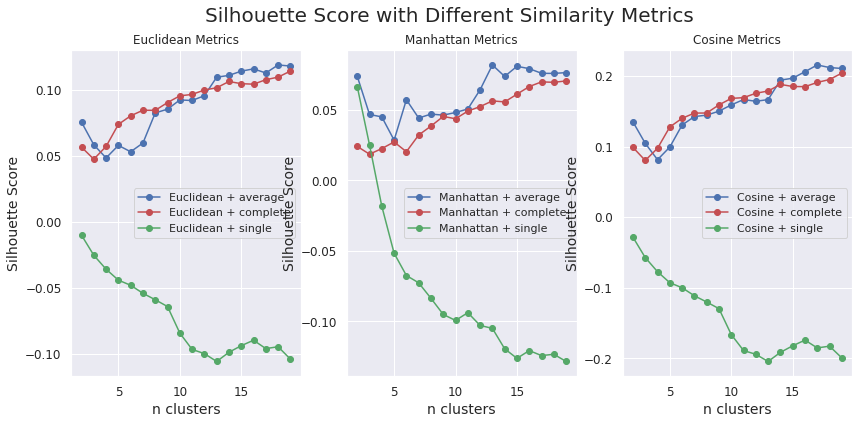

In [161]:
# create a multiple plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].plot(range(2, 20), silhouette_score_euc_average, "bo-", label='Euclidean + average')
ax[0].plot(range(2, 20), silhouette_score_euc_complete, "ro-", label='Euclidean + complete')
ax[0].plot(range(2, 20), silhouette_score_euc_single, "go-", label='Euclidean + single')

ax[0].set_title('Euclidean Metrics')
ax[0].set_xlabel("n clusters", fontsize=14)
ax[0].set_ylabel("Silhouette Score", fontsize=14)
ax[0].legend(loc=0);

ax[1].plot(range(2, 20), silhouette_score_man_average, "bo-", label='Manhattan + average')
ax[1].plot(range(2, 20), silhouette_score_man_complete, "ro-", label='Manhattan + complete')
ax[1].plot(range(2, 20), silhouette_score_man_single, "go-", label='Manhattan + single')

ax[1].set_title('Manhattan Metrics')
ax[1].set_xlabel("n clusters", fontsize=14)
ax[1].set_ylabel("Silhouette Score", fontsize=14)
ax[1].legend(loc=0);

ax[2].plot(range(2, 20), silhouette_score_cos_average, "bo-", label='Cosine + average')
ax[2].plot(range(2, 20), silhouette_score_cos_complete, "ro-", label='Cosine + complete')
ax[2].plot(range(2, 20), silhouette_score_cos_single, "go-", label='Cosine + single')

ax[2].set_title('Cosine Metrics')
ax[2].set_xlabel("n clusters", fontsize=14)
ax[2].set_ylabel("Silhouette Score", fontsize=14)
ax[2].legend(loc=0);

fig.suptitle('Silhouette Score with Different Similarity Metrics', size=20)


### 3.2.3 Evalution - Calinski Harabasz Score

In [162]:
# set parameters
# using gridsearch methodology to handle our problems
param_grid_agglo = {
    'n_clusters': range(2, 20),
    'linkage': ['single', 'average', 'complete'],
    'affinity': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2']
}

# init gridsearch model using our function
gridsearch_model_agglo = GridSearch(
    cluster_type = 'AgglomerativeClustering',
    param_grid = param_grid_agglo,
    score_type = 'calinski_harabasz_score'
)

# train KMeansClustering and find best param combination
gridsearch_model_agglo.fit(wv_df)

'Grid Search Completed. Plase use get_results() to get best param combination.'

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model_agglo.get_results()

# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['n_clusters']) 

# Data process for plot
# Euclidean
ch_score_euc_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'average')]
ch_score_euc_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'complete')]
ch_score_euc_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'single')]

# Manhattan
ch_score_man_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'average')]
ch_score_man_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'complete')]
ch_score_man_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'single')]

# Cosine
ch_score_cos_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'average')]
ch_score_cos_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'complete')]
ch_score_cos_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'single')]

Text(0.5, 0.98, 'Calinski Harabasz Score with Different Similarity Metrics')

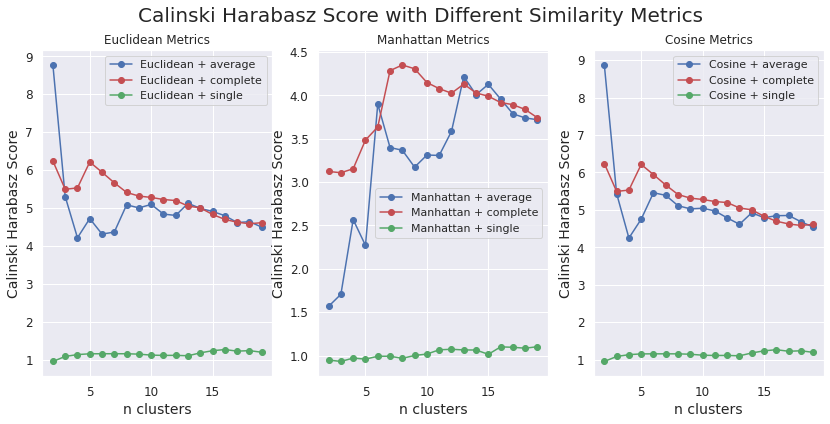

In [164]:
# create a multiple plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].plot(range(2, 20), ch_score_euc_average, "bo-", label='Euclidean + average')
ax[0].plot(range(2, 20), ch_score_euc_complete, "ro-", label='Euclidean + complete')
ax[0].plot(range(2, 20), ch_score_euc_single, "go-", label='Euclidean + single')

ax[0].set_title('Euclidean Metrics')
ax[0].set_xlabel("n clusters", fontsize=14)
ax[0].set_ylabel("Calinski Harabasz Score", fontsize=14)
ax[0].legend(loc=0);

ax[1].plot(range(2, 20), ch_score_man_average, "bo-", label='Manhattan + average')
ax[1].plot(range(2, 20), ch_score_man_complete, "ro-", label='Manhattan + complete')
ax[1].plot(range(2, 20), ch_score_man_single, "go-", label='Manhattan + single')

ax[1].set_title('Manhattan Metrics')
ax[1].set_xlabel("n clusters", fontsize=14)
ax[1].set_ylabel("Calinski Harabasz Score", fontsize=14)
ax[1].legend(loc=0);

ax[2].plot(range(2, 20), ch_score_cos_average, "bo-", label='Cosine + average')
ax[2].plot(range(2, 20), ch_score_cos_complete, "ro-", label='Cosine + complete')
ax[2].plot(range(2, 20), ch_score_cos_single, "go-", label='Cosine + single')

ax[2].set_title('Cosine Metrics')
ax[2].set_xlabel("n clusters", fontsize=14)
ax[2].set_ylabel("Calinski Harabasz Score", fontsize=14)
ax[2].legend(loc=0);

fig.suptitle('Calinski Harabasz Score with Different Similarity Metrics', size=20)



---


# 4. DBSCAN Clustering

## 4.1 Travel Review Dataset

### 4.1.1 Train DBSCAN clustering 

In [168]:
# set parameters
# using gridsearch methodology to handle our problems
parameters_dbscan = {
    'eps': [0.001, 0.01, 0.1, 0.5, 1, 5],
    'min_samples': [3, 5, 8, 10],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# init gridsearch model using our function
gridsearch_model = GridSearch(
    cluster_type = 'DBSCAN',
    param_grid = parameters_dbscan,
    score_type = 'silhouette_score'
)

# train our model and find best param combination
gridsearch_model.fit(TA_data)

'Grid Search Completed. Plase use get_results() to get best param combination.'

Those model with lots of noise can't be evaluated.

Here we set a noise ratio threshold to fliter those with lots of noise.

In [0]:
# get gridsearch results
gridsearch_results = gridsearch_model.get_results()

# sort by min_samples
gridsearch_results = sorted(gridsearch_results, key=lambda item: item['min_samples'], reverse=True) 

In [0]:
number_of_samples = parameters_dbscan['min_samples']

# clustered_result = [item for item in gridsearch_results if item['score'] > 0]
noise_ratio = [item['noise_ratio'] for item in gridsearch_results ]
clustered_eps = [item['eps'] for item in gridsearch_results ]
clustered_min_samples = [item['min_samples'] for item in gridsearch_results ]

No handles with labels found to put in legend.


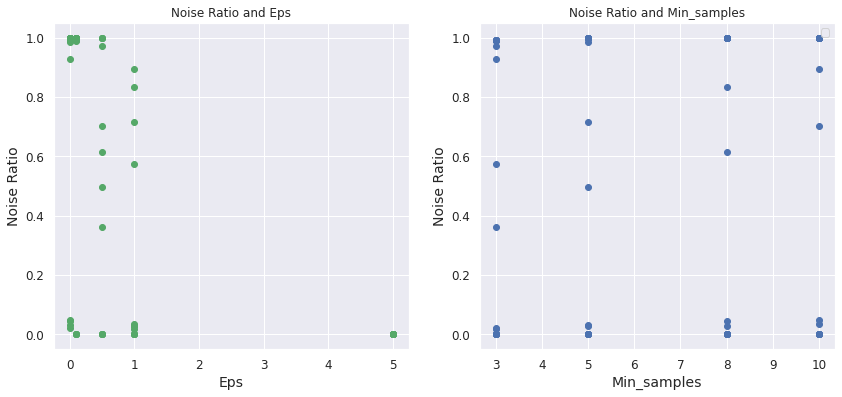

In [214]:
# create a multiple plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(clustered_eps, noise_ratio, 'go')

ax[0].set_title('Noise Ratio and Eps')
ax[0].set_xlabel("Eps", fontsize=14)
ax[0].set_ylabel("Noise Ratio", fontsize=14)

# Plot our noise ratio
ax[1].plot(clustered_min_samples, noise_ratio, 'bo')

ax[1].set_title('Noise Ratio and Min_samples')
ax[1].set_xlabel("Min_samples", fontsize=14)
ax[1].set_ylabel("Noise Ratio", fontsize=14)

plt.legend(loc=0);

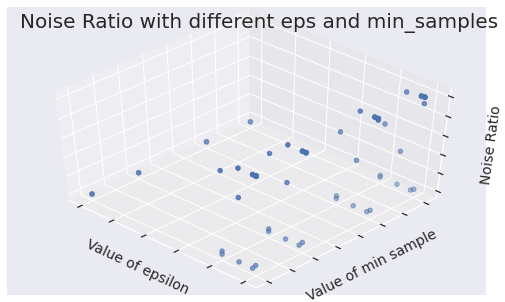

In [222]:
# Let's create a beautiful 3d-plot
fig = plt.figure(1, figsize=(7, 4))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

# Change the order of labels, so that they match
ax.scatter(clustered_eps, clustered_min_samples, noise_ratio, 
           cmap=plt.cm.nipy_spectral)

ax.set_xlabel('Value of epsilon')
ax.set_ylabel('Value of min sample')
ax.set_zlabel('Noise Ratio')

fig.suptitle('Noise Ratio with different eps and min_samples', size=20)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

In this graph, it's obvious that when eps is too small, then every point will be noise; 

but if it get too big, then the number of cluster will become only a huge one.

Thus, we'll only evaluate those whose noise ratio is less than 0.2;

That means, more than 80% of points are clustered.

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model.get_results()

# the ratio of noise can't greater than 10%, so we set thershold as 0.9



### 4.1.2 Evaluation - Silhouette Score

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model.get_results()

# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['eps']) 

# Data process for plot
# Euclidean
silhouette_score_euc_3 = [item['score'] for item in kmeans_results if (item['metric'] == 'euclidean' and item['min_samples'] == 3)]
silhouette_score_euc_5 = [item['score'] for item in kmeans_results if (item['metric'] == 'euclidean' and item['min_samples'] == 5)]
silhouette_score_euc_8 = [item['score'] for item in kmeans_results if (item['metric'] == 'euclidean' and item['min_samples'] == 8)]
silhouette_score_euc_10 = [item['score'] for item in kmeans_results if (item['metric'] == 'euclidean' and item['min_samples'] == 10)]

# Manhattan
silhouette_score_man_3 = [item['score'] for item in kmeans_results if (item['metric'] == 'manhattan' and item['min_samples'] == 3)]
silhouette_score_man_5 = [item['score'] for item in kmeans_results if (item['metric'] == 'manhattan' and item['min_samples'] == 5)]
silhouette_score_man_8 = [item['score'] for item in kmeans_results if (item['metric'] == 'manhattan' and item['min_samples'] == 8)]
silhouette_score_man_10 = [item['score'] for item in kmeans_results if (item['metric'] == 'manhattan' and item['min_samples'] == 10)]

# Cosine
silhouette_score_cos_3 = [item['score'] for item in kmeans_results if (item['metric'] == 'cosine' and item['min_samples'] == 3)]
silhouette_score_cos_5 = [item['score'] for item in kmeans_results if (item['metric'] == 'cosine' and item['min_samples'] == 5)]
silhouette_score_cos_8 = [item['score'] for item in kmeans_results if (item['metric'] == 'cosine' and item['min_samples'] == 8)]
silhouette_score_cos_10 = [item['score'] for item in kmeans_results if (item['metric'] == 'cosine' and item['min_samples'] == 10)]


In [0]:
# create a multiple plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

ax[0].plot(range(2, 20), silhouette_score_euc_3, "bo-", label='Euclidean + average')
ax[0].plot(range(2, 20), silhouette_score_euc_5, "ro-", label='Euclidean + complete')
ax[0].plot(range(2, 20), silhouette_score_euc_8, "go-", label='Euclidean + single')

ax[0].set_title('Euclidean Metrics')
ax[0].set_xlabel("n clusters", fontsize=14)
ax[0].set_ylabel("Silhouette Score", fontsize=14)
ax[0].legend(loc=0);

ax[1].plot(range(2, 20), silhouette_score_man_average, "bo-", label='Manhattan + average')
ax[1].plot(range(2, 20), silhouette_score_man_complete, "ro-", label='Manhattan + complete')
ax[1].plot(range(2, 20), silhouette_score_man_single, "go-", label='Manhattan + single')

ax[1].set_title('Manhattan Metrics')
ax[1].set_xlabel("n clusters", fontsize=14)
ax[1].set_ylabel("Silhouette Score", fontsize=14)
ax[1].legend(loc=0);

ax[2].plot(range(2, 20), silhouette_score_cos_average, "bo-", label='Cosine + average')
ax[2].plot(range(2, 20), silhouette_score_cos_complete, "ro-", label='Cosine + complete')
ax[2].plot(range(2, 20), silhouette_score_cos_single, "go-", label='Cosine + single')

ax[2].set_title('Cosine Metrics')
ax[2].set_xlabel("n clusters", fontsize=14)
ax[2].set_ylabel("Silhouette Score", fontsize=14)
ax[2].legend(loc=0);

fig.suptitle('Silhouette Score with Different Similarity Metrics', size=20)

### 4.1.3 Evaluation - Calinski Harabasz Score

In [0]:
# get gridsearch results
kmeans_results = gridsearch_model.get_results()

# sort by n_clusters
kmeans_results = sorted(kmeans_results, key=lambda item: item['n_clusters']) 

# Data process for plot
# Euclidean
ch_score_euc_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'average')]
ch_score_euc_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'complete')]
ch_score_euc_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'euclidean' and item['linkage'] == 'single')]

# Manhattan
ch_score_man_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'average')]
ch_score_man_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'complete')]
ch_score_man_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'manhattan' and item['linkage'] == 'single')]

# Cosine
ch_score_cos_average = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'average')]
ch_score_cos_complete = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'complete')]
ch_score_cos_single = [item['score'] for item in kmeans_results if (item['affinity'] == 'cosine' and item['linkage'] == 'single')]

### First evaluation

In [0]:
# Please comment your code

### Second evaluation 

In [0]:
# Please comment your code

## 4.2 ICMLA Dataset

### Train DBSCAN clustering 

In [0]:
# Please comment your code
parameters_dbscan = {
    'eps': [0.001, 0.01, 0.1, 0.5, 1, 5],
    'min_samples': [3, 5, 8, 10],
    'metric': ['euclidean', 'manhattan']
}

### First evaluation 

In [0]:
# Please comment your code

### Second evaluation 

In [0]:
# Please comment your code